Tiling demo

In [1]:
from nerd.io import Nerd, import_tracmap
from nerd.density_functions import normal
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

Concat data

# Setting up field parameters

In [6]:
dict_parameters = dict(spatial_resolution = 18, width = 60, aperture_diameter = 90, density_function = normal, input_data_path = 'data/nerd_san_benito/first_day/all_first_day.txt', input_calibration_data = "../tests/data/expected_calibration_data.csv")


In [7]:
dict_parameters

{'spatial_resolution': 18,
 'width': 60,
 'aperture_diameter': 90,
 'density_function': <function nerd.density_functions.density_functions.normal(distance: float, width: float, parameter: float) -> float>,
 'input_data_path': 'data/nerd_san_benito/first_day/all_first_day.txt',
 'input_calibration_data': '../tests/data/expected_calibration_data.csv'}

# Run Nerd model

In [8]:
nerd_model = Nerd(dict_parameters)
nerd_model.calculate_total_density()
nerd_model.export_results_geojson(target_density=6)

MemoryError: Unable to allocate 10.4 GiB for an array with shape (2, 695625715) and data type float64

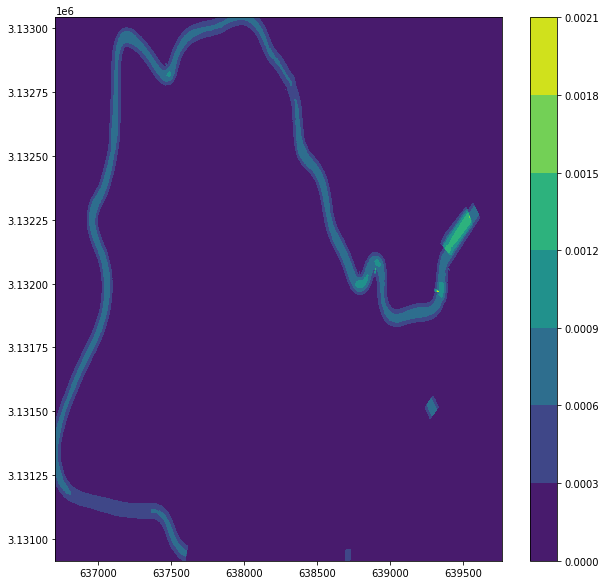

In [45]:
contour = plt.contourf(nerd_model.x_grid, nerd_model.y_grid, nerd_model.total_density)
cbar = plt.colorbar(contour)

In [41]:
day_1_grid = nerd_model.x_grid

In [46]:
day_2_grid = nerd_model.x_grid

In [48]:
np.testing.assert_array_equal(day_1_grid, day_2_grid)    

AssertionError: 
Arrays are not equal

(shapes (113, 537), (1066, 1531) mismatch)
 x: array([[296215.23034, 296217.23034, 296219.23034, ..., 297283.23034,
        297285.23034, 297287.23034],
       [296215.23034, 296217.23034, 296219.23034, ..., 297283.23034,...
 y: array([[636706.240717, 636708.240717, 636710.240717, ..., 639762.240717,
        639764.240717, 639766.240717],
       [636706.240717, 636708.240717, 636710.240717, ..., 639762.240717,...

## If you need other target density value, you can only run export_results_geojson with the new density.

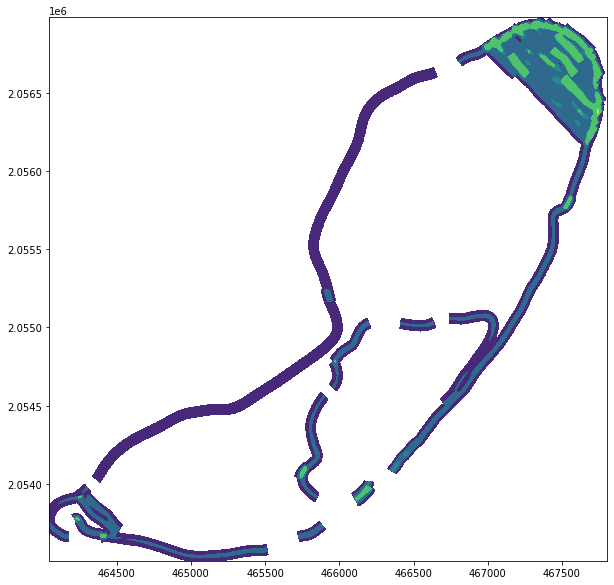

In [6]:
nerd_model.export_results_geojson(target_density=0.002)